In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,SpectralClustering,DBSCAN,Birch
from scipy.cluster.hierarchy import dendrogram , linkage
from collections import defaultdict

import matplotlib.pyplot as plt

In [2]:
da = pd.read_csv("zoo.csv")
data = da.drop( ["animal_name"]+["class_type"], axis=1)
col = data["legs"]
maxx = col.max()
data['legs'] = data['legs'].apply(lambda x: x / maxx)


In [3]:
pca = PCA(2)
 
df = pca.fit_transform(data)
 


Kmeans

In [19]:
kmeans = KMeans(n_clusters= 7, random_state=1)
 
label = kmeans.fit_predict(df)


In [5]:
D = defaultdict(lambda:0)
for item in label:
    D[item] += 1

In [6]:
for k,v in D.items():
    print (k,v)

1 35
2 14
5 13
3 7
0 18
4 6
6 8


Agglomerative clustering

In [42]:
agg_clustering = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward', )
labels = agg_clustering.fit_predict(df)


array([0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 6, 3, 2, 2, 2, 1, 0, 3, 4, 6, 1,
       0, 1, 1, 5, 5, 0, 0, 0, 6, 0, 0, 2, 3, 0, 0, 1, 3, 6, 6, 1, 1, 6,
       0, 0, 2, 0, 4, 0, 0, 6, 5, 2, 0, 0, 1, 6, 5, 6, 3, 3, 5, 4, 0, 0,
       4, 0, 0, 0, 0, 1, 1, 3, 4, 4, 3, 2, 2, 2, 5, 1, 3, 6, 0, 2, 3, 1,
       1, 5, 1, 5, 3, 0, 0, 1, 0, 6, 0, 1, 6], dtype=int64)

In [29]:
D_agg = defaultdict(lambda:0)
for item in labels:
    D_agg[item] += 1

In [30]:
for j,l in D_agg.items():
    print (j,l)

0 35
3 14
6 12
2 10
1 16
4 6
5 8


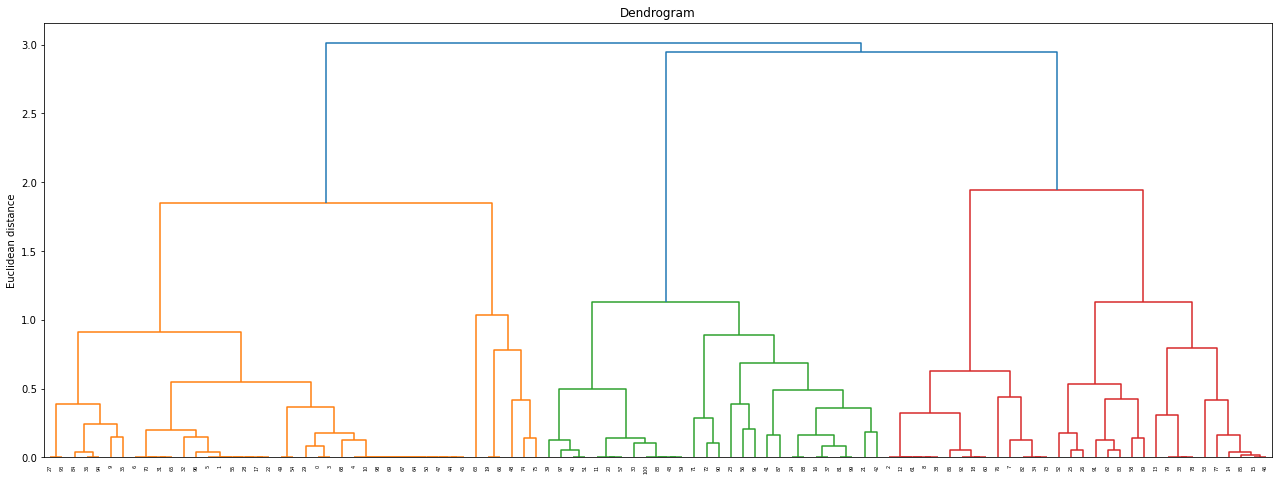

In [10]:
##qui costruistisco un dendogramma per un clusterign gerarchico



Z = linkage(df, method = 'complete')
 
plt.figure(figsize = (22,8))
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [11]:
## Algoritmo Spectral Clustering

clustering = SpectralClustering(n_clusters=7, assign_labels="discretize", random_state=0).fit_predict(df)

D_spec = defaultdict(lambda:0)
for item in clustering:
    D_spec[item] += 1
    
for a,b in D_spec.items():
    print (a,b)

0 35
2 9
3 13
1 15
4 16
5 5
6 8


In [33]:
u_clustering = np.unique(clustering)

In [37]:
## Algoritmo DBSCAN basato sulla densità 

dbscan =DBSCAN(eps=0.3,min_samples=4).fit_predict(df)

D_dbscan = defaultdict(lambda:0)
for item in dbscan:
    D_dbscan[item] += 1
    
for c,d in D_dbscan.items():
    print (c,d)

0 35
1 9
2 4
3 28
-1 15
4 5
5 5


In [14]:
u_dbscan = np.unique(dbscan)


In [40]:
### Algoritmo Birch

brc = Birch(n_clusters=7, threshold = 0.1,)
u = brc.fit_predict(df)

u_birch= np.unique(u)


In [41]:
D_brc = defaultdict(lambda:0)
for item in u:
    D_brc[item] += 1
    

for ee,ff in D_brc.items():
    print (ee,ff)

4 35
3 14
5 13
2 10
1 15
0 6
6 8


In [17]:
## funzione per trovare la posizione di ogni membro del cluster nel dataset originale 

def select_points(data, label, cluster):
    pos = [i for i, x in enumerate(label) if x == cluster]
    return da.iloc[pos]

In [18]:
select_points(da,label,2)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
34,haddock,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
38,herring,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
60,pike,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
61,piranha,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
73,seahorse,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
